In [2]:
!pip install pycaret

In [3]:
from pycaret.utils import version
version()

'3.0.0.rc8'

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (10,13)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [58]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.4
Seaborn version:  0.11.2


In [59]:
colnames=['Season', 'Age', 'Childish Diseases', 'Accident/Trauma', 'Surgical Intervention', 'Recent High fever', 'Alcohol Consumption', 'Smoking', 'Activity', 'Output Diagnosis']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt', header = None, names=colnames )
df.head(25)

,Season,Age,Childish Diseases,Accident/Trauma,Surgical Intervention,Recent High fever,Alcohol Consumption,Smoking,Activity,Output Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N
8,1.00,0.64,0,0,1,0,0.8,-1,0.25,N
9,1.00,0.61,1,0,0,0,1.0,-1,0.25,N


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 100 non-null    float64
 1   Age                    100 non-null    float64
 2   Childish Diseases      100 non-null    int64  
 3   Accident/Trauma        100 non-null    int64  
 4   Surgical Intervention  100 non-null    int64  
 5   Recent High fever      100 non-null    int64  
 6   Alcohol Consumption    100 non-null    float64
 7   Smoking                100 non-null    int64  
 8   Activity               100 non-null    float64
 9   Output Diagnosis       100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [61]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [62]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


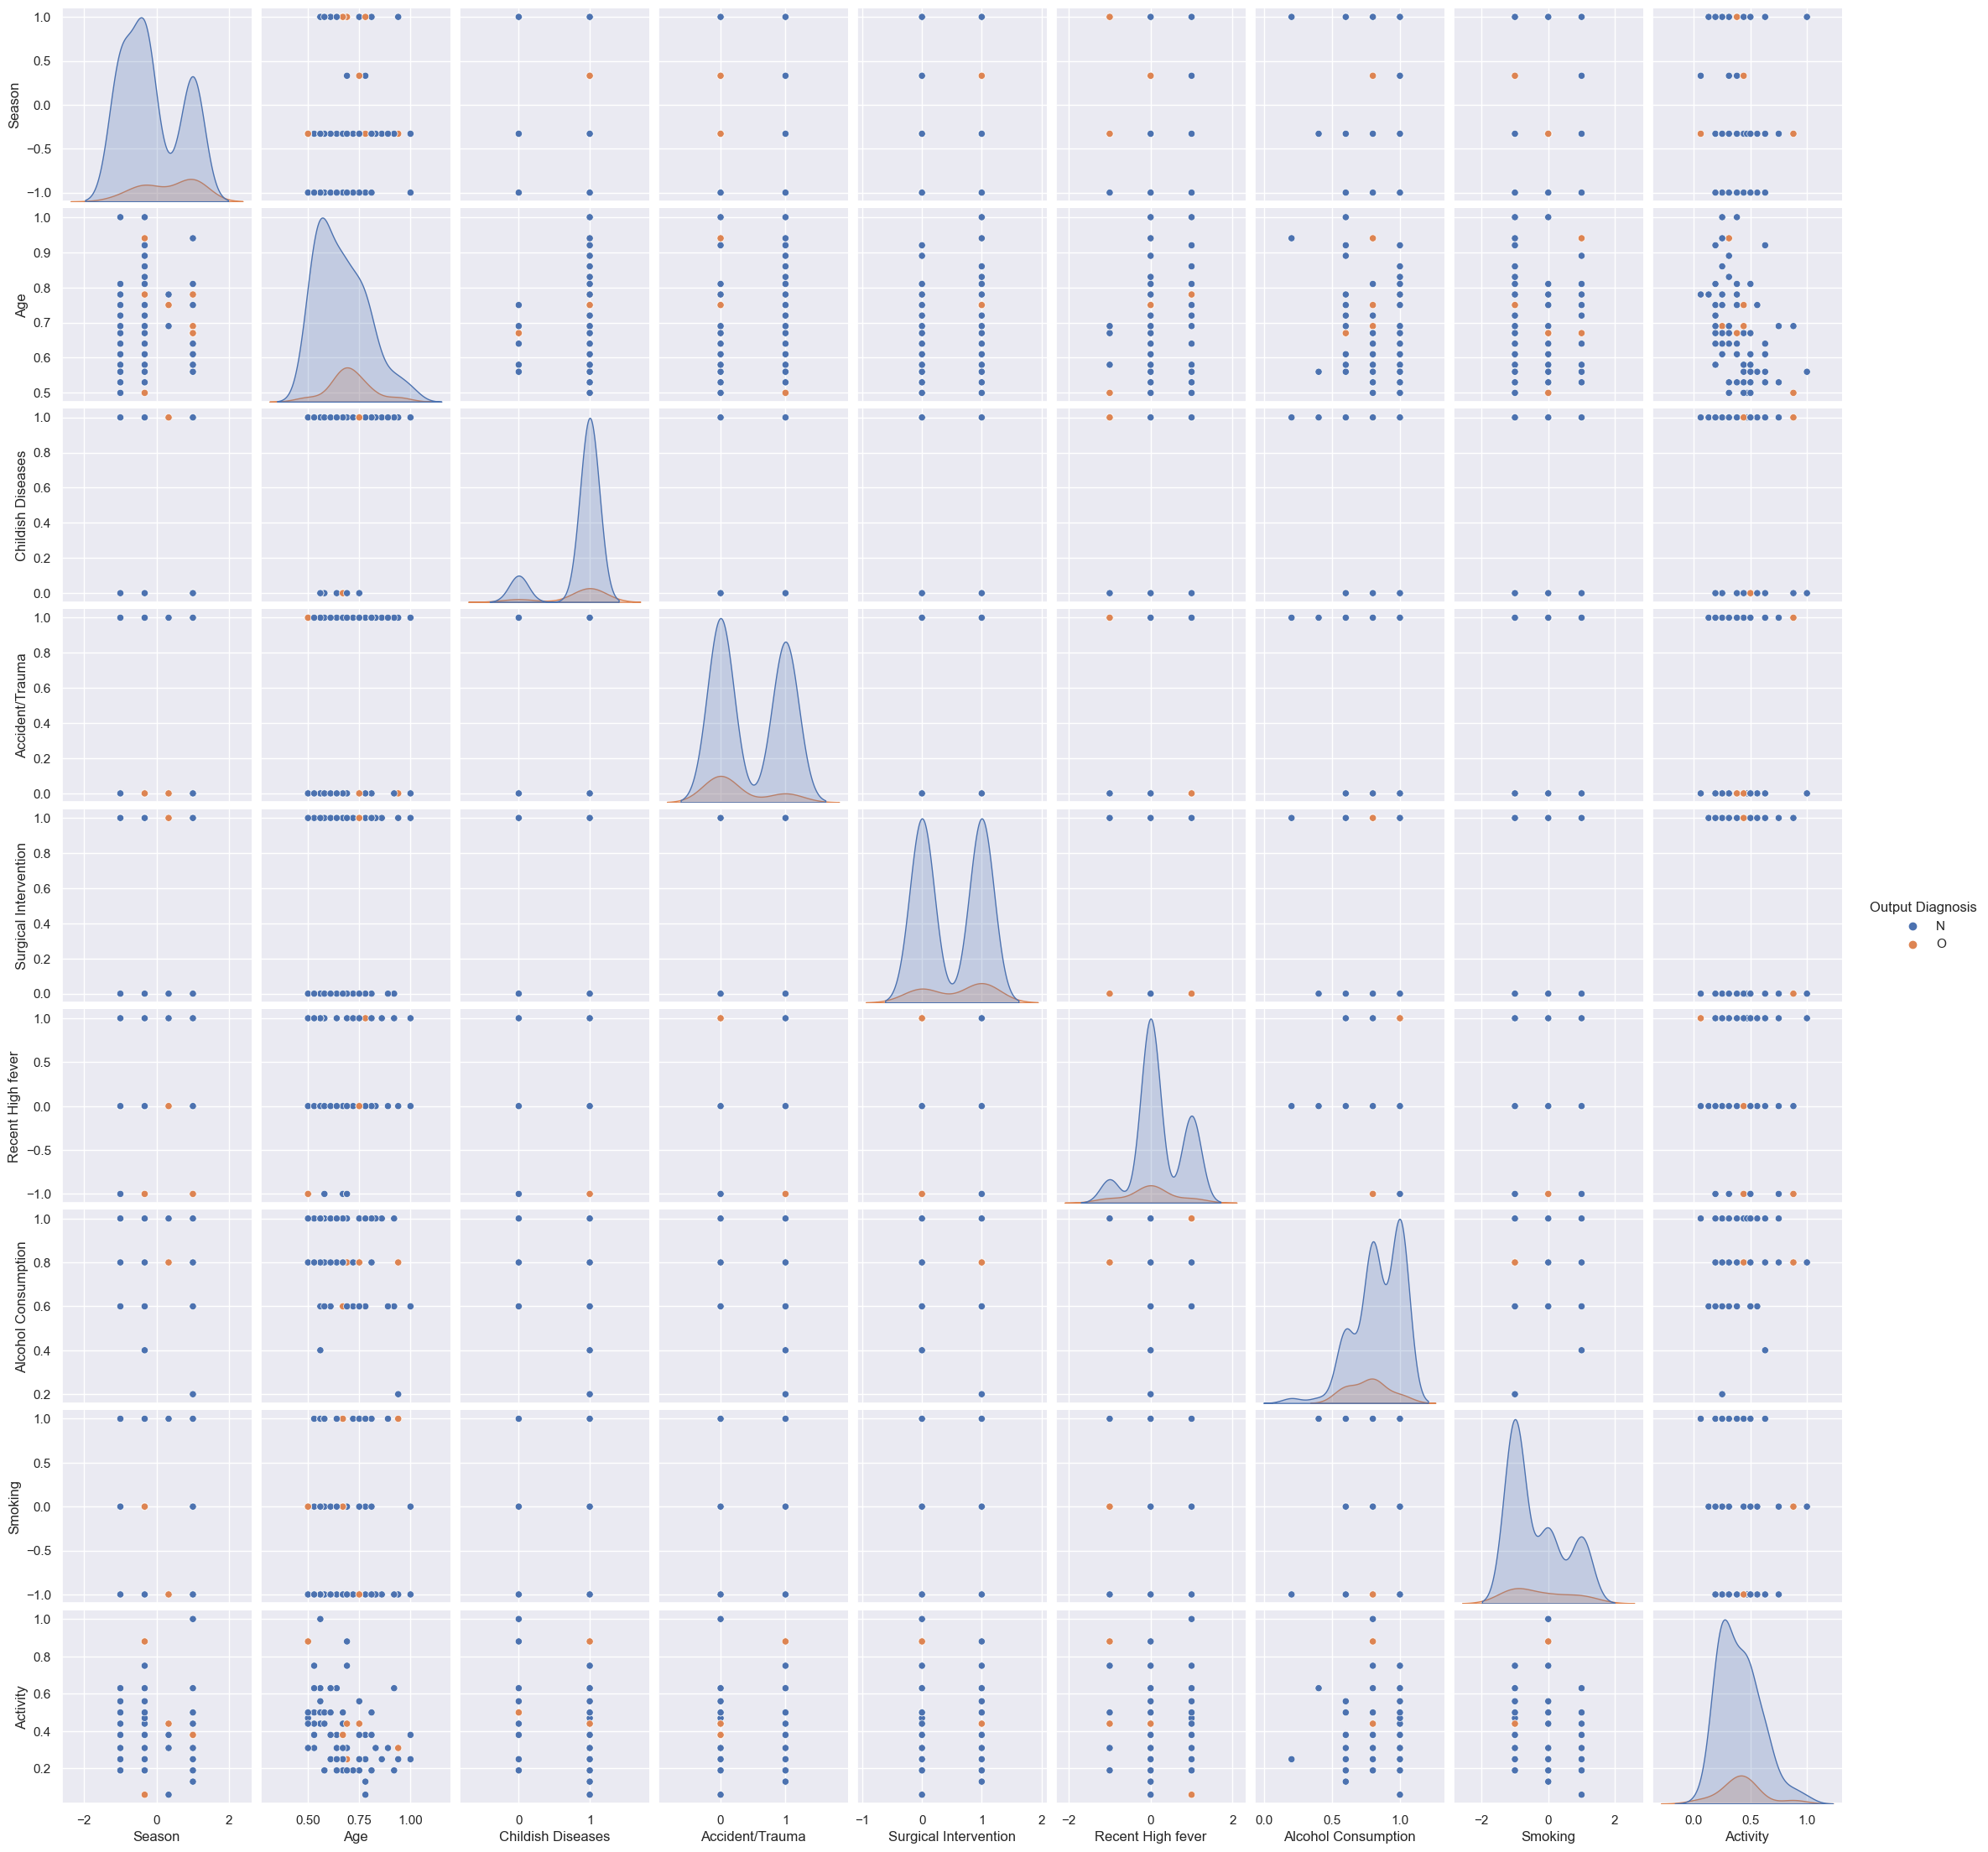

In [63]:
sns.pairplot(df, hue='Output Diagnosis')
plt.show()

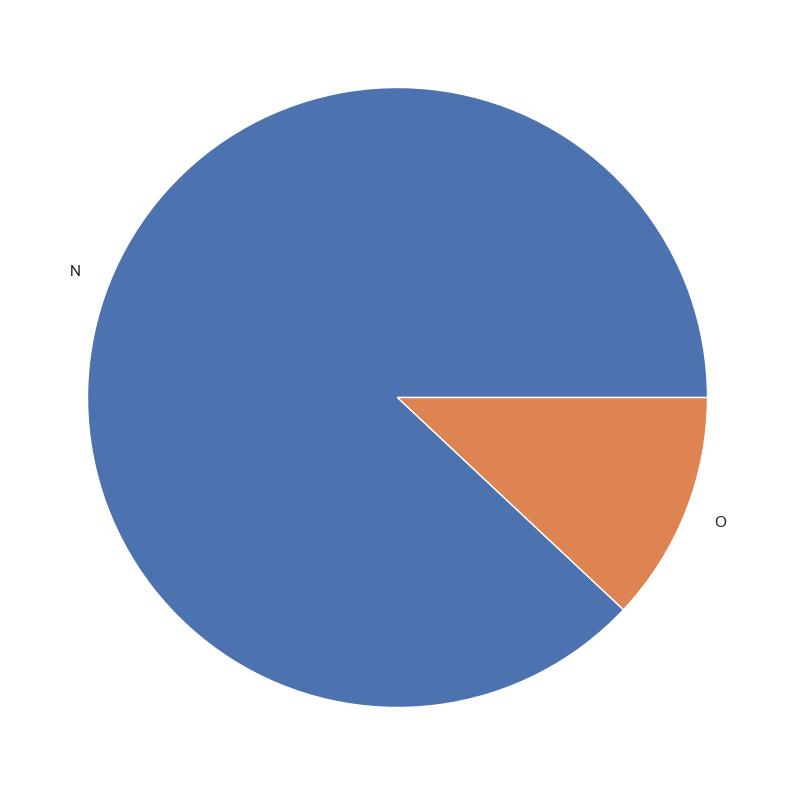

In [64]:
y =df['Output Diagnosis']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [67]:
X = df.drop(columns=['Output Diagnosis'])
X.head(10)

,Season,Age,Childish Diseases,Accident/Trauma,Surgical Intervention,Recent High fever,Alcohol Consumption,Smoking,Activity
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50
5,-0.33,0.67,1,0,1,0,0.8,0,0.50
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38
8,1.00,0.64,0,0,1,0,0.8,-1,0.25
9,1.00,0.61,1,0,0,0,1.0,-1,0.25


In [68]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Season,100.0,-0.0789,0.796725,-1.00,-1.00,-0.33,1.00,1.0
Age,100.0,0.6690,0.121319,0.50,0.56,0.67,0.75,1.0
Childish Diseases,100.0,0.8700,0.337998,0.00,1.00,1.00,1.00,1.0
Accident/Trauma,100.0,0.4400,0.498888,0.00,0.00,0.00,1.00,1.0
Surgical Intervention,100.0,0.5100,0.502418,0.00,0.00,1.00,1.00,1.0
Recent High fever,100.0,0.1900,0.580752,-1.00,0.00,0.00,1.00,1.0
Alcohol Consumption,100.0,0.8320,0.167501,0.20,0.80,0.80,1.00,1.0
Smoking,100.0,-0.3500,0.808728,-1.00,-1.00,-1.00,0.00,1.0
Activity,100.0,0.4068,0.186395,0.06,0.25,0.38,0.50,1.0


In [69]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Season,Age,Childish Diseases,Accident/Trauma,Surgical Intervention,Recent High fever,Alcohol Consumption,Smoking,Activity
0,-0.316753,0.173970,-2.586949,1.128152,0.980196,-0.328810,-0.192006,0.434959,2.551481
1,-0.316753,2.245043,0.386556,-0.886405,0.980196,-0.328810,-0.192006,1.677698,-0.521943
2,-0.316753,-1.400045,0.386556,-0.886405,-1.020204,-0.328810,1.008032,-0.807781,0.502532
3,-0.316753,0.671028,-2.586949,1.128152,0.980196,-0.328810,1.008032,-0.807781,-0.144505
4,-0.316753,0.008284,0.386556,1.128152,-1.020204,-0.328810,-0.192006,-0.807781,0.502532
5,-0.316753,0.008284,0.386556,-0.886405,0.980196,-0.328810,-0.192006,0.434959,0.502532
6,-0.316753,0.008284,-2.586949,-0.886405,-1.020204,-2.059391,-0.192006,-0.807781,0.179013
7,-0.316753,2.742100,0.386556,1.128152,0.980196,-0.328810,-1.392045,-0.807781,-0.144505
8,1.360990,-0.240244,-2.586949,-0.886405,0.980196,-0.328810,-0.192006,-0.807781,-0.845461
9,1.360990,-0.488773,0.386556,-0.886405,-1.020204,-0.328810,1.008032,-0.807781,-0.845461


In [70]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Season,100.0,-2.664535e-17,1.005038,-1.161931,-1.161931,-0.316753,1.360990,1.360990
Age,100.0,-1.912359e-16,1.005038,-1.400045,-0.902988,0.008284,0.671028,2.742100
Childish Diseases,100.0,1.199041e-16,1.005038,-2.586949,0.386556,0.386556,0.386556,0.386556
Accident/Trauma,100.0,7.105427e-17,1.005038,-0.886405,-0.886405,-0.886405,1.128152,1.128152
Surgical Intervention,100.0,5.107026e-17,1.005038,-1.020204,-1.020204,0.980196,0.980196,0.980196
Recent High fever,100.0,-2.586820e-16,1.005038,-2.059391,-0.328810,-0.328810,1.401770,1.401770
Alcohol Consumption,100.0,9.503509e-16,1.005038,-3.792121,-0.192006,-0.192006,1.008032,1.008032
Smoking,100.0,7.216450e-17,1.005038,-0.807781,-0.807781,-0.807781,0.434959,1.677698
Activity,100.0,3.019807e-16,1.005038,-1.869936,-0.845461,-0.144505,0.502532,3.198517


In [71]:
observations = list(df.index)
variables = list(df.columns)

In [83]:
X

,Season,Age,Childish Diseases,Accident/Trauma,Surgical Intervention,Recent High fever,Alcohol Consumption,Smoking,Activity
0,-0.316753,0.173970,-2.586949,1.128152,0.980196,-0.32881,-0.192006,0.434959,2.551481
1,-0.316753,2.245043,0.386556,-0.886405,0.980196,-0.32881,-0.192006,1.677698,-0.521943
2,-0.316753,-1.400045,0.386556,-0.886405,-1.020204,-0.32881,1.008032,-0.807781,0.502532
3,-0.316753,0.671028,-2.586949,1.128152,0.980196,-0.32881,1.008032,-0.807781,-0.144505
4,-0.316753,0.008284,0.386556,1.128152,-1.020204,-0.32881,-0.192006,-0.807781,0.502532
...,...,...,...,...,...,...,...,...,...
95,-1.161931,0.008284,0.386556,-0.886405,-1.020204,-0.32881,1.008032,-0.807781,0.502532
96,-1.161931,-0.488773,0.386556,-0.886405,-1.020204,-0.32881,-0.192006,0.434959,0.502532
97,-1.161931,0.008284,0.386556,1.128152,0.980196,-0.32881,1.008032,-0.807781,-0.521943
98,-1.161931,-0.240244,0.386556,-0.886405,0.980196,-0.32881,1.008032,0.434959,-1.168979


In [86]:
# sns.boxplot(data=X)

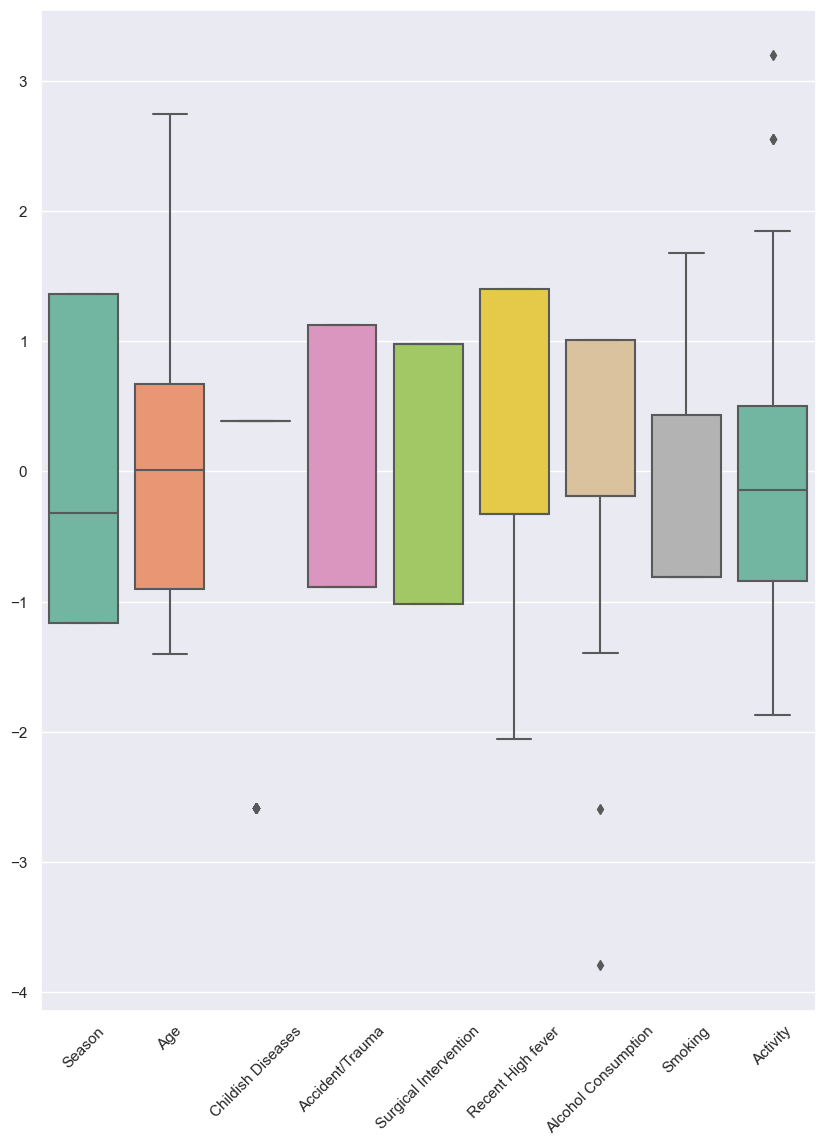

In [88]:
ax = plt.figure()
ax = sns.boxplot(data=X, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

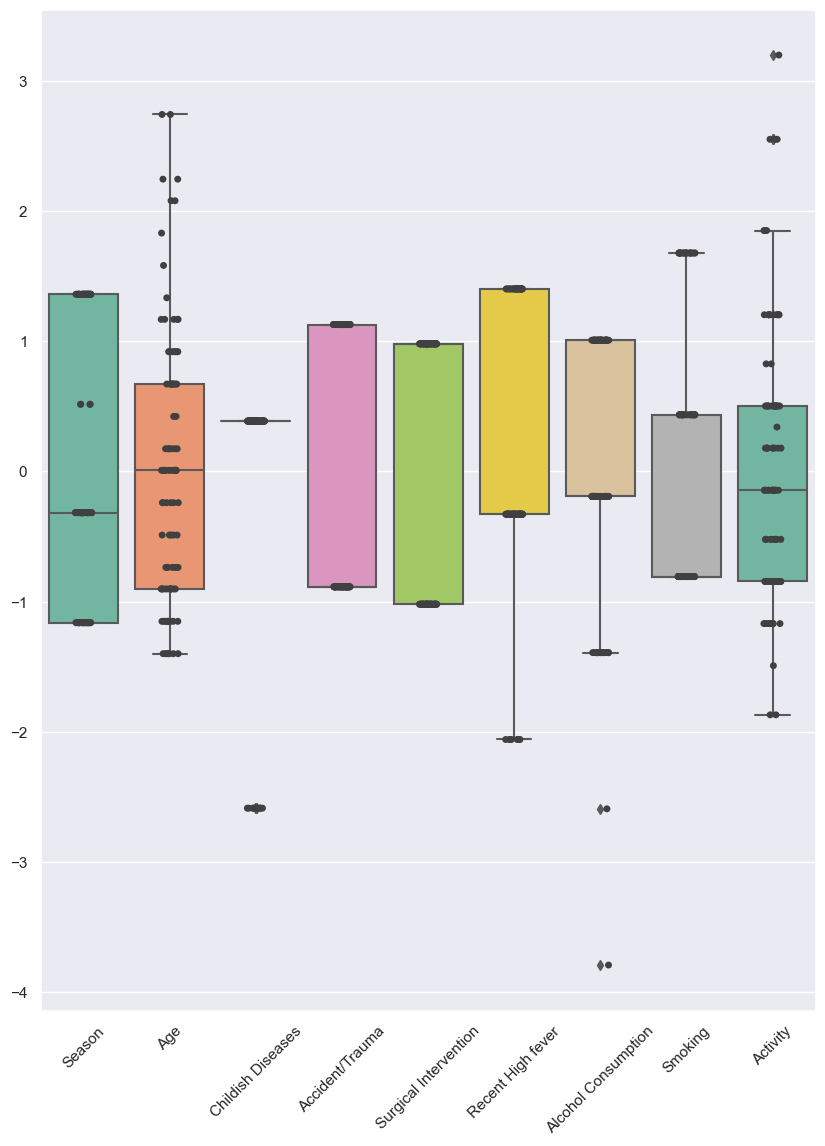

In [91]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.show()

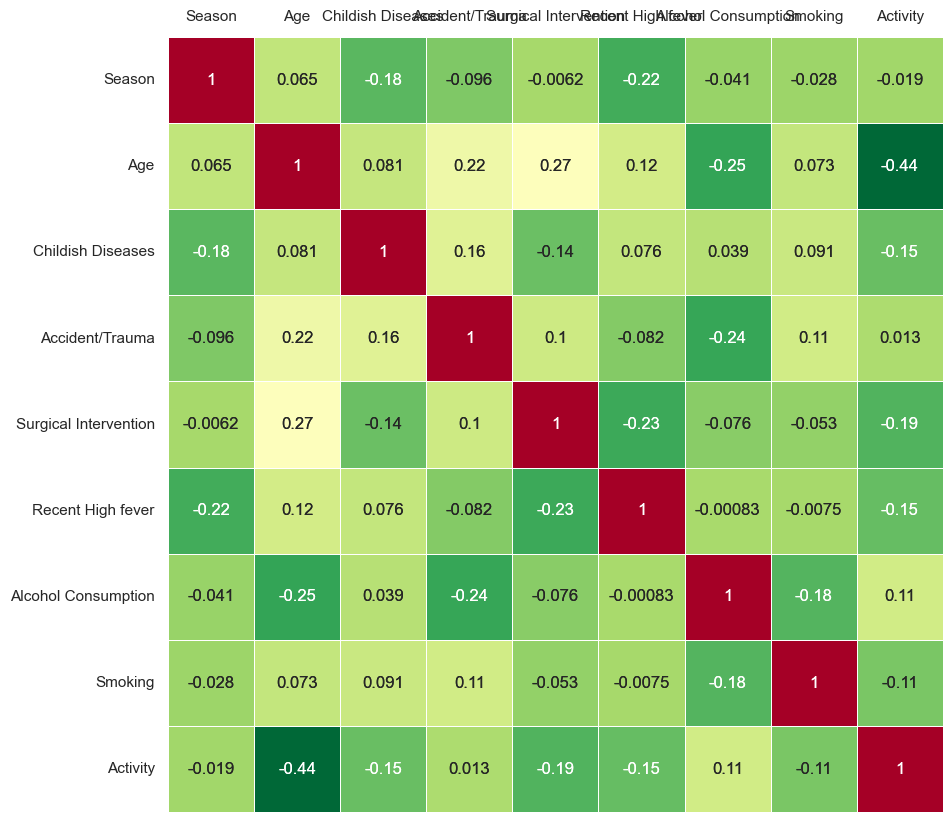

In [93]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.show()

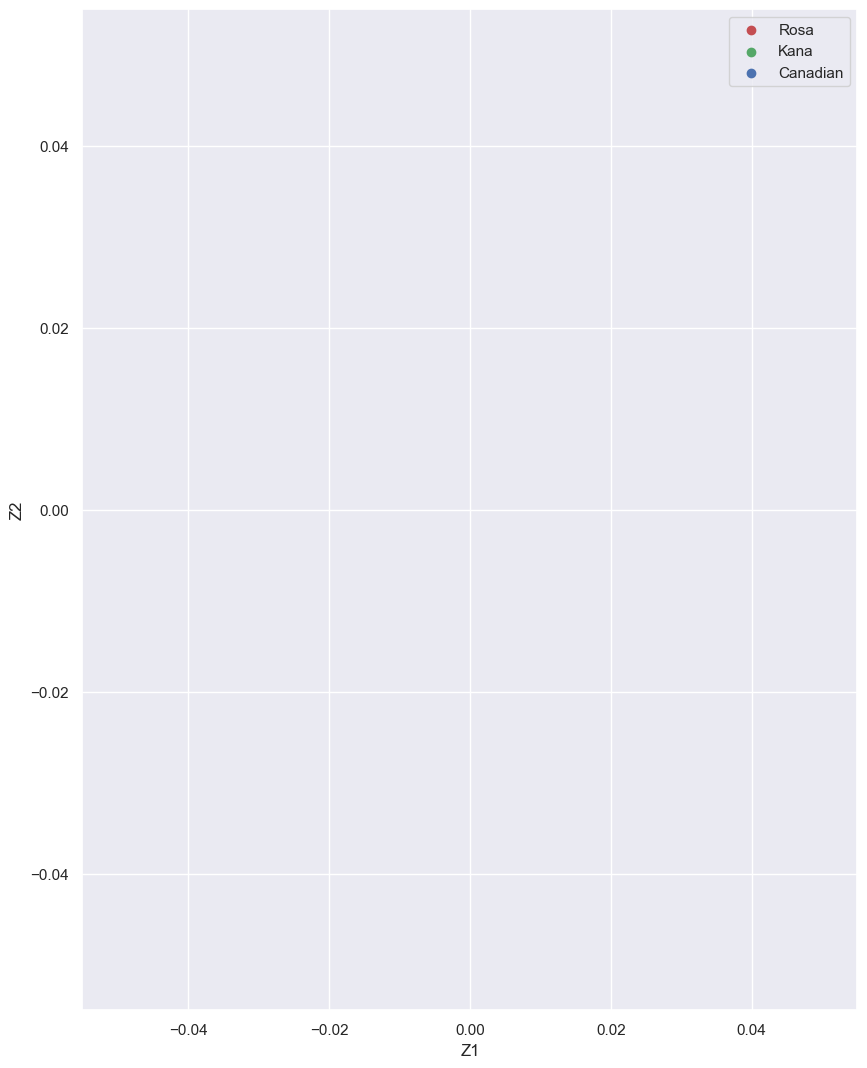

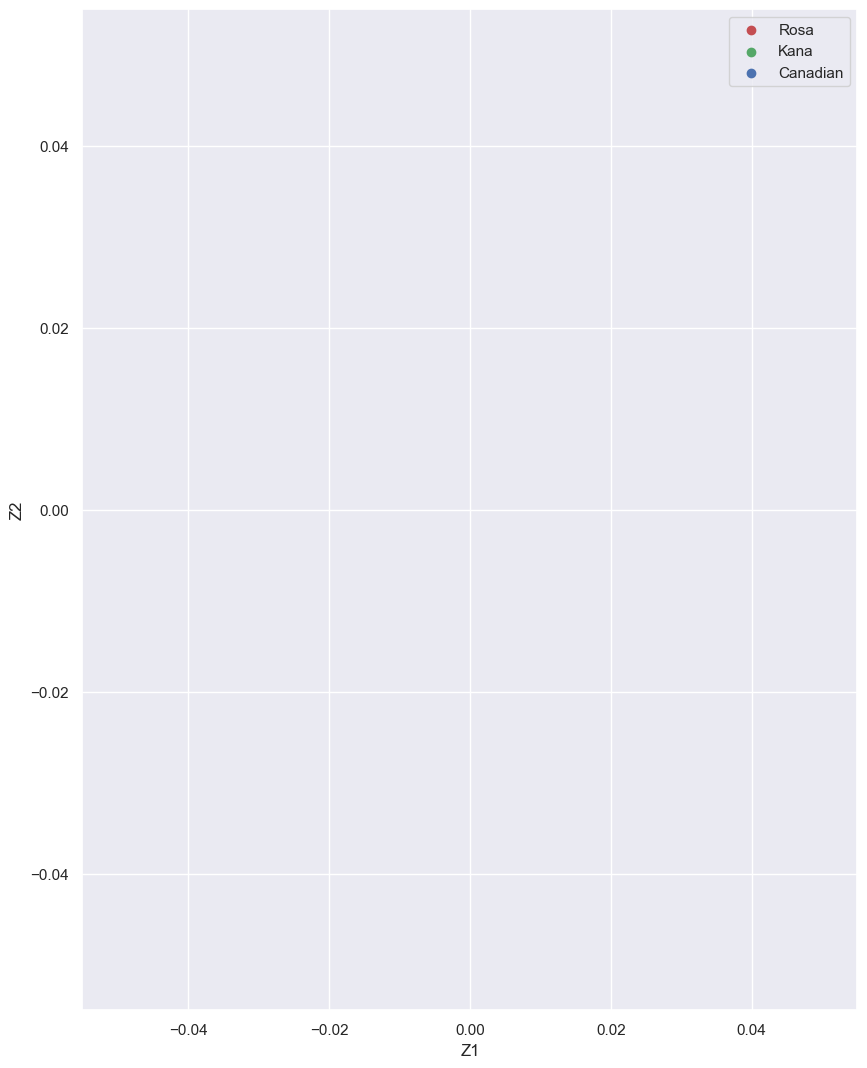

In [96]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()